In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import torch
# import tensorflow as tf
# import xgboost as xgb

# print(f"1. PyTorch GPU Available: {torch.cuda.is_available()}")
# if torch.cuda.is_available():
#     print(f"   Device: {torch.cuda.get_device_name(0)}")

# print(f"\n2. TensorFlow GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
# print("   (Harusnya False untuk TF 2.15 di Windows)")

# # XGBoost cek build info
# print(f"\n3. XGBoost Version: {xgb.__version__}")

1. PyTorch GPU Available: True
   Device: NVIDIA GeForce RTX 5080

2. TensorFlow GPU Available: False
   (Harusnya False untuk TF 2.15 di Windows)

3. XGBoost Version: 2.0.3


c:\Users\BiruLangit\anaconda3\envs\myvnev\lib\site-packages\torch\cuda\__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5080 with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_90.
If you want to use the NVIDIA GeForce RTX 5080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(


In [3]:
path = "D:\predictive_pm25\data\data_training\TUTL_RAW_2023-2025.csv"

In [4]:
df = pd.read_csv(path)

In [10]:
df.describe()

,id,temperature,humidity,sht31_temp,sht31_hum,co2,pm25,ws,wd,pressure,solar
count,426650.000000,417519.000000,4.176560e+05,276408.000000,322366.000000,401906.000000,407618.000000,243101.000000,872.000000,3.318800e+04,0.0
mean,255305.428016,26.264783,3.085701e+05,24.179864,77.782093,639.712592,44.605762,2.721174,0.254587,1.381887e+05,NaN
std,149923.457442,91.214645,2.573745e+07,95.337150,250.183434,223.343031,302.523151,81.301086,7.517869,1.420302e+06,NaN
min,1.000000,-1250.000000,-1.250000e+03,-8.810000,-114346.000000,0.000000,0.000000,0.000000,0.000000,-1.242553e+04,NaN
25%,106663.250000,24.300000,5.800000e+01,21.470000,67.000000,537.020020,20.000000,0.140000,0.000000,0.000000e+00,NaN
50%,278137.500000,26.590000,7.000000e+01,23.340000,82.000000,626.460000,38.000000,2.080000,0.000000,9.247865e+04,NaN
75%,385181.750000,29.420000,8.090000e+01,28.200000,92.000000,705.030030,55.000000,4.060000,0.000000,9.275921e+04,NaN
max,491844.000000,30350.000000,2.147484e+09,24304.000000,61337.000000,4989.965820,64319.000000,40000.000000,222.000000,3.219415e+07,NaN


In [18]:
total_rows = len(df)
missing = df.isnull().sum()
present = df.notnull().sum()
pct_missing = (missing / total_rows) * 100
quality_report = pd.DataFrame({
    'Data Hilang': missing,
    'Data Tersedia': present,
    'Total Seharusnya': total_rows,
    '% Hilang': pct_missing
})
print(quality_report.sort_values(by='% Hilang', ascending=False))

             Data Hilang  Data Tersedia  Total Seharusnya    % Hilang
solar             426650              0            426650  100.000000
wd                425778            872            426650   99.795617
pressure          393462          33188            426650   92.221259
ws                183549         243101            426650   43.020977
sht31_temp        150242         276408            426650   35.214344
sht31_hum         104284         322366            426650   24.442517
co2                24744         401906            426650    5.799602
pm25               19032         407618            426650    4.460799
temperature         9131         417519            426650    2.140162
humidity            8994         417656            426650    2.108051
id                     0         426650            426650    0.000000
created_at             0         426650            426650    0.000000


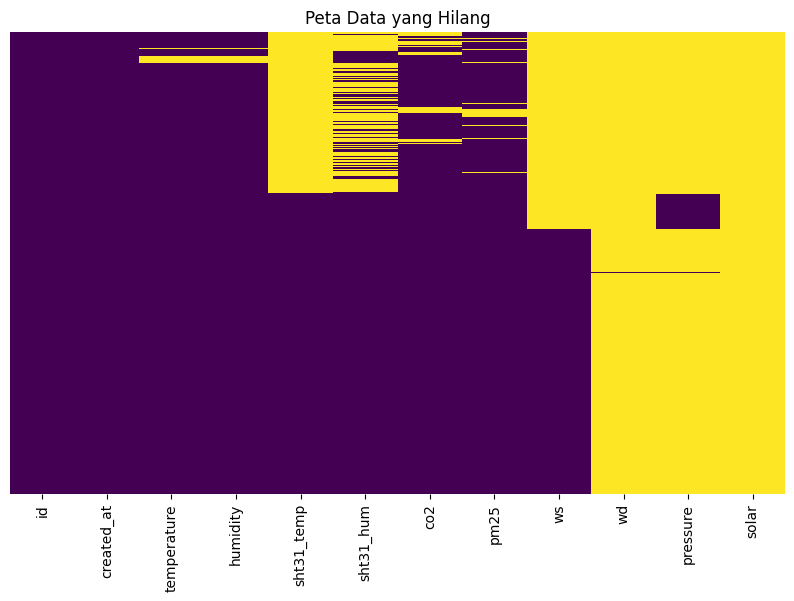

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Peta Data yang Hilang')
plt.show()